# Numerical methods

$$
 \newcommand{d}{\,{\rm d}}
 \def\vc#1{\mathbf{\boldsymbol{#1}}}     % vector
 \def\tn#1{{\mathbb{#1}}}
 \def\Real{{\rm\bf R}}
 \def\prtl{\partial}
$$

As we have already noted, the analytical solution can only be found for particular ODE systems. 
A general solution procedure is only available for linear systems with constant coefficients 
and even here we are limited to small systems for which, we are able to find eigenvalues.
Numerical methods make it possible to solve general systems of ODE approximately.
The error could be made small, but ussually increase with simulation time.
Some natural processes are described by equations, where a small perturbation of 
the initial condition leads to large differences after certain time or even to qualitatively 
different solutions. An example would be a ball on the edge. The equation describing the weather also belong
to this category with makes reliable long-term forcasts intractable.

As any system of ODE of any order can be converted to a system of equations of the first order, we can limit ourselves to the investigation of numerical methods for first-order equations, namely the initial problem:
$$
\dot{\vc y}=\vc f(t,\vc y),\qquad\vc y(0)=\vc \xi.
$$
We restrict ourselves to the initial time $\tau =0$ and solutions only for positive times $t>0$. Time reversion
could be done by change of the time variable $t = -s$.

Furthermore, in order to ensure the existence of a unique solution to the problem (see the Pickard theorem),
we will require the following properties of the right-hand side function $f$:

- vector function $\vc f$ is a continuous function on the strip $(t,\vc x) \in \langle a,b\rangle\times \Real^n$

- $\vc f$ is Lipschit on this strip in the form $\vc x$ with a constant $L$ independent of $t$, i.e.
  
  $$
    \|\vc f(t, \vc x) - \vc f(t, \vc y)\| \le L \|\vc x - \vc y\|, \qquad \text{ for all } t\ in\langle a,b     \rangle,\ x,\,y \in \Real^n
  $$

The values of the solution and the function of the right side are from the space $\Real^n$, on which we will consider any given norm $\|\cdot\|$, e.g. Euclidean.


## Explicit Euler's Method
\[
\def\vc
\]
In context of numerical methods, we approximate unknown function $y(t)$ by a sequence of values $y_i$, $i=1,\dots, N$ at particular set of discrete times $t_i$. As the simples case let us choose discrete times regularly:

$$
t_i=a+ih,\quad i=\in I_N=\{0,1,\dots, N\},
$$

kde $N=T/h$ for the end time $T$. The $h$ is named the "integration step" or just "step" of the method.

The simplest method follwos by simple approximation of the derivative by a difference:

$$
\vc{y}'(t_{i+1}) \approx \frac{\vc y_{i+1} - \vc y_{i}}{h} = \vc f(t_i, \vc y_i)   
$$   

Alternatively, we can the Taylor expansion (at time $t=0$) to calculate the solution:

$$
  \vc y(h) = \vc y(0) + h \vc y'(0) + O(h^2) = \vc y_0 + h \vc f(0, \vc y_0) + O(h^ 2).
$$

We get Euler's method if we neglect the term $O(h^2)$ in the previous formula. This gives us the approximate value of the solution $\vc y(h) \approx \vc y_1$ at time $t_1=h$. 

Performin the same for the initial time $t = h$, we get the value of the approximate solution at time 
$t_2=2h$:

$$
  \vc y(2h) \approx \vc y_2 = \vc y_1 + h \vc f(h, \vc y_1).
$$

In general, the approximate solution at time $t_{i+1}=(i+1)h$ is given by the recurrent formula:

$$
   \vc y_{i+1} = \vc y_i + h f(t_i, \vc y_i),\qquad t_i=ih,\qquad i>0.
$$

This is how we gradually get the values of the approximate solution $y_i$ in times $t_i$, for $i=1,2,\dots$
Thus, at each step we construct a tangent to the exact solution starting at the point $(t_i, \vc y_i)$
and until time $t_{n+1}$ we approximate the solution with this tangent, viz. Fig Euler aprox.

From the discrete sequaence of values, we can reconstruct the piecewise linear function as:
$$
   \vc{\tilde y}(t) = \frac{\vc y_{i+1}(t - t_i) + \vc y_i(t_{i+1}-t)}{h},\qquad \text {on } [t_i, t_{i+1}].
$$

## Numerical Errors

Usage of an approximate solution introduces an error (global error) between exact and approximate solution, which is result of propagation an accumulation of errors at individual steps (local errror). This can be directly related to the error of the numerical scheme. Moreover we have to deal with error due to usage of inexact representation of the real numbers in computer (inexact arithmetic). Let us describe these times of errors in more detail.

In Figure Euler approx, we see the exact solution (green) of the equation $y'=2y$ for the initial condition $(t_0, y_0)$. The red line depicts the piecewise linear approximate solution.


<center><img src="numerical_errors.png" alt="discrete errors" width="600"/></center>
<font size= “1”> Fig. Euler approx: Exact solution (green) and approximate solution (red) calculated by the explicit Euler method. Local errors $d_i$ (orange) and global error $e_3 (black, right)$. </font>


Difference between these two functions is:

**Global error** $\vc e_i$ at time $t_i$ is the difference between the exact and approximate solution after $i$ steps of the method:
$$
    \vc e_i = \vc y(t_i) - \vc y_i.
$$
while both solutions satisfy the same initial condition $\vc y(t_0)=\vc y_0$.

In a more general sense, we can understand the global error as the function 
$\vc e(t) = \vc y(t) - \vc{\tilde y}(t)$.

The global error contains (but not simply sum) of local errors at individual steps.
The **local error** $\vc d_i$ is difference between the exact and the approximate solution after one step.
For the first step, it is equivalent to the global error
$\vc d_1=\vc e_1=\vc y(t_1; t_0, \vc y_0) - \vc y_1$. 
For the general step $i$, we have to consider the exact solution $\vc y(t; t_{i-1}, \vc y_{i-1})$,
which starts from the value of the approximate solution $\vc y_{i-1}$ at the previous time $t_{i-1}$, these solutions are marked as dashed blue line in the Figure.


**Local error** $\vc d_i$ at time $t_i$ is the difference between the exact and approximate solution after one step of the method,

$$
   \vc d_i = \vc y(t_i; t_{i-1}, \vc y_{i-1}) - \vc y_i,
$$

where the exact solution satisfies the initial condition $\vc y(t_{i-1}) = \vc y_{i-1}$. 
Local error is closely related to the *local discretization error*.
To define it, we first introduce the difference operator of Euler's method:
$$
 \mathcal{L}_h \vc y(t_i) = \frac{\vc y(t_i) - \vc y(t_{i-1})}{h} - \vc f(t_{i-1}, \vc y(t_{i-1})), \quad \text{for }i>0.
$$

**Local discretization error** $\vc{\tau}_i$ at time $t_i$ is the accuracy with which the exact solution
 $y(t_i; t_{i-1}, y_{i-1})$ satisfies the difference equation of the method:
 $$
   \vc{\tau}_i = \mathcal{L}_h \vc y(t_i)
 $$


In the case of the explicit Euler method, we have
$$
  \vc d_i = \vc y(t_i; t_{i-1}, \vc y_{i-1}) - \vc y_i = \vc y(t_i) - \Big\{\vc y_{i-1} + h \vc f(t_{i-1}, \vc y_{i-1})\Big\} = h\mathcal{L}_h \vc y(t_i)
$$
and thus $\vc \tau_i = \vc d_i/h$. For other methods, the relationship between local error and local discretization error can be a bit more complex.
                                                                  

### Practical demonstration of errors
Let us solve equation 
$$
y' = -100 y,\quad y(0)=1.
$$ 
It poses an exact solution 

$$
y(t) = \exp(-100t).
$$

Folowing code use explicit Euler method with timestep $h=0.001$.

Resulting table columns:
- $i$ - step number
- $t_i$ - simulation time
- $y_i$ - numerical solution at time $t_i$
- $d_i$ - local error
- $e_i$ - global error

In [3]:
import pandas as pd
import numpy as np
import math

# solving y' = -100 y

l = -10

def euler(y, h):
    return y *(1 + h * l)

def exact(t, t0, y0):
    return math.exp(l * (t - t0)) * y0

def solve(h, N, method):
    y0 = 1.0
    solution = [[0, 0, y0, 0, 0]]
    y = y0
    for i in range(1, N):
        t = h * i
        yy = method(y, h)
        d = exact(t, h * (i-1), y) - yy
        e = exact(t, 0, y0) - yy
        solution.append([i,t,yy,d,e])
        y =yy
    return solution
    
solution = solve(h=0.0001, N=10000, method=euler)
table = pd.DataFrame(solution, columns=['i', 't_i', 'y_i', 'd_i', 'e_i'])
display(table.loc[0:100,:])
    

,i,t_i,y_i,d_i,e_i
0,0,0.0000,1.000000,0.000000e+00,0.000000e+00
1,1,0.0001,0.999000,4.998334e-07,4.998334e-07
2,2,0.0002,0.998001,4.993335e-07,9.986673e-07
3,3,0.0003,0.997003,4.988342e-07,1.496503e-06
4,4,0.0004,0.996006,4.983354e-07,1.993343e-06
...,...,...,...,...,...
96,96,0.0096,0.908420,4.545133e-07,4.363432e-05
97,97,0.0097,0.907512,4.540588e-07,4.404476e-05
98,98,0.0098,0.906604,4.536048e-07,4.445435e-05
99,99,0.0099,0.905698,4.531512e-07,4.486306e-05


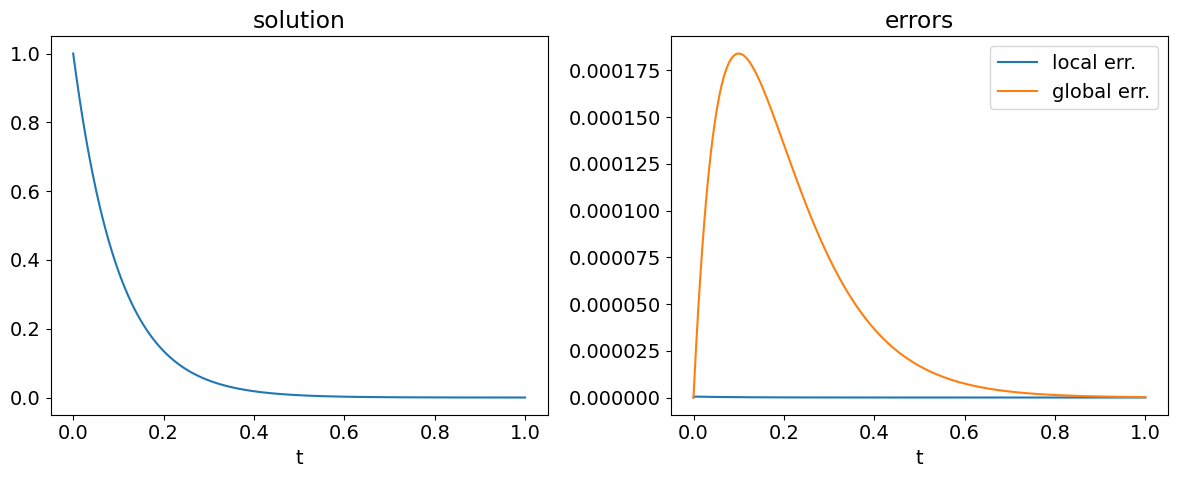

In [4]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.set_title("solution")
ax1.plot(table.t_i, table.y_i)
ax1.set_xlabel("t")
ax2.set_title("errors")
ax2.plot(table.t_i, table.d_i, label="local err.")
ax2.plot(table.t_i, table.e_i, label="global err.")
ax2.set_xlabel("t")
ax2.legend()
fig.tight_layout()

We see that the local error is very small but the global error is accumulating over time. However ever the global error finaly reach a maximum 

## Consistent and convergent
We shall introduce two concepts consistency and convergency ralated to the local discretization error and global error, respectively.


### Consistency

A method is said to be **consistent** if it holds
$$
   \def\norm#1{\|#1\|} 
   \lim_{h\to 0} \max_{i\in I_N} \norm{\vc \tau_i} = 0.
$$
I.e. local discretization error converge to $0$ on whole solution interval.

The method is consistent of order $p$ if $\norm{\vc\tau_i} = O(h^p)$ holds for all $i=1,\dots, N$, i.e.
$$
        \norm{\vc \tau_i} \le C h^p
$$
for some constant $C$ and all sufficiently small $h$.


### Convergency

A method is said to be **convergent** of order $p$ if the global error
of the numerical solution on a fixed interval $t \in [0,T]$ converges to zero 
with $h$ approaching zero:
$$
    \lim_{h\to 0} \max_{i\in I_N} \norm{\vc e_i} = 0.
$$
If $\max_{i<N} \norm{\vc e_i} = O(h^p)$, we say that the method converges to order $p$.



Let us see the impact of the integration step for the Euler's method of the first order ($p=1$) and a method of the second order ($p=2$).

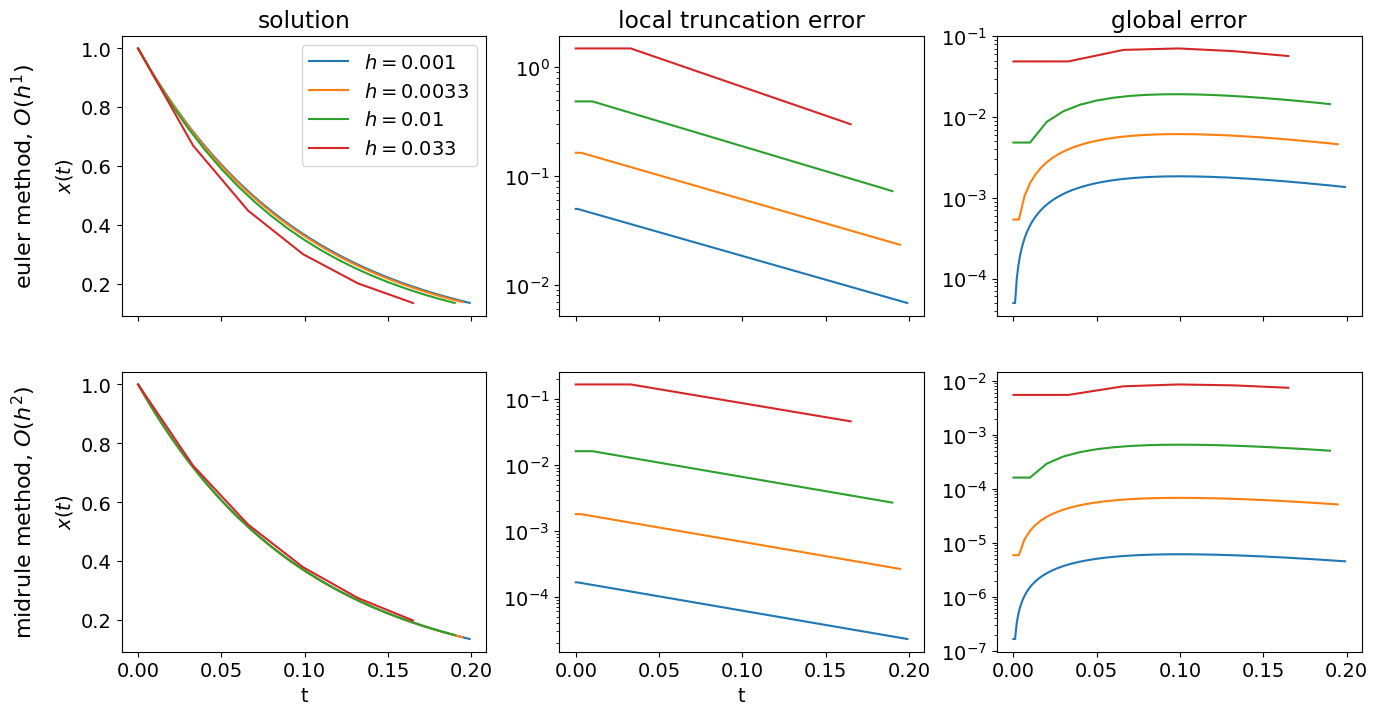

In [5]:
import matplotlib
import matplotlib.pyplot as plt


def midrule(y, h):
    y1 = y * (1 + 0.5 *h * l)
    return y  + h * l * y1
   
    
def solve_to_time(h, T, method):
    return np.array(solve(h, int(T/h), method)).T

font = {'size'   : 14}

matplotlib.rc('font', **font)
fig, axes = plt.subplots(2, 3, figsize=(16,8), sharex=True)
methods = (euler, midrule)
for ax, m in zip(axes, methods): 
    ax[1].set_yscale('log')
    ax[2].set_yscale('log')
    for h in [0.001, 0.0033, 0.01, 0.033]:  
        s = solve_to_time(h, 0.2, method=m)
        
        #print(s[2])
        ax[0].plot(s[1], s[2], label=f"$h = {h}$")
        s[4][0] = s[4][1] #np.maximum(s[4], 1e-6)
        s[3][0] = s[3][1] #np.maximum(s[4], 1e-6)
        ax[1].plot(s[1], np.abs(s[3])/h, label=f"$h = {h}$")
        ax[2].plot(s[1], np.abs(s[4]), label=f"$h = {h}$")
        

for i, m in enumerate(methods):
    method_label = f"{m.__name__} method, $O(h^{i+1})$"
    axes[i][0].annotate(method_label, (0, 0.5), xytext=(-60, 0), ha='right', va='center',
                size=16, rotation=90, xycoords='axes fraction',
                textcoords='offset points')
    axes[i][0].set_ylabel("$x(t)$")
    axes[1][i].set_xlabel("t")

axes[0][0].set_title("solution")
axes[0][1].set_title("local truncation error")
axes[0][2].set_title("global error")

axes[0][0].legend()
plt.show()

In the left column, you see a comparison of the first-order Euler's method and the second-order midpoint rule in terms of the actual numerical solution. There is a slight difference for large integration steps $h$. However, in order to appreciate the second-order method, we must compare local and global errors. Clearly, both errors decrease with decreasing step $h$, but the decay is twice as fast for the second-order method. E.g. the global error of Euler's method drops one order of magnitude, from about $2\times 10^{-2}$ to $2\times 10^{-3}$, while decreasing $h$ from $0.01$ to $0.001$. For the midpoint rule, we observe a drop of about two orders of magnitude, from $4\times 10^{-4}$ to $4\times 10^{-6}$.

# Effect of round-off error

The numerical methods are solved on computers using a floating-point arithmetic which introduces a **round-off error**. 
Let us compare effect of this error for:

- explicit Euler method (order 1)
- midpoint rule method (order 2)
- Heun's method or average method (order 2)

The effect of the round-off when computing in [double-precision](https://en.wikipedia.org/wiki/Double-precision_floating-point_format) finite arithmetic is quite small. It could be of practical importance for stiff problems where one could be forced to use billions of integration steps and more. In order to 
observe the effect of round-off error in a reasonable time, we artificially perform rounding to $8$ decimal digits, while the double-precision offers about $15$ valid decimal places. 

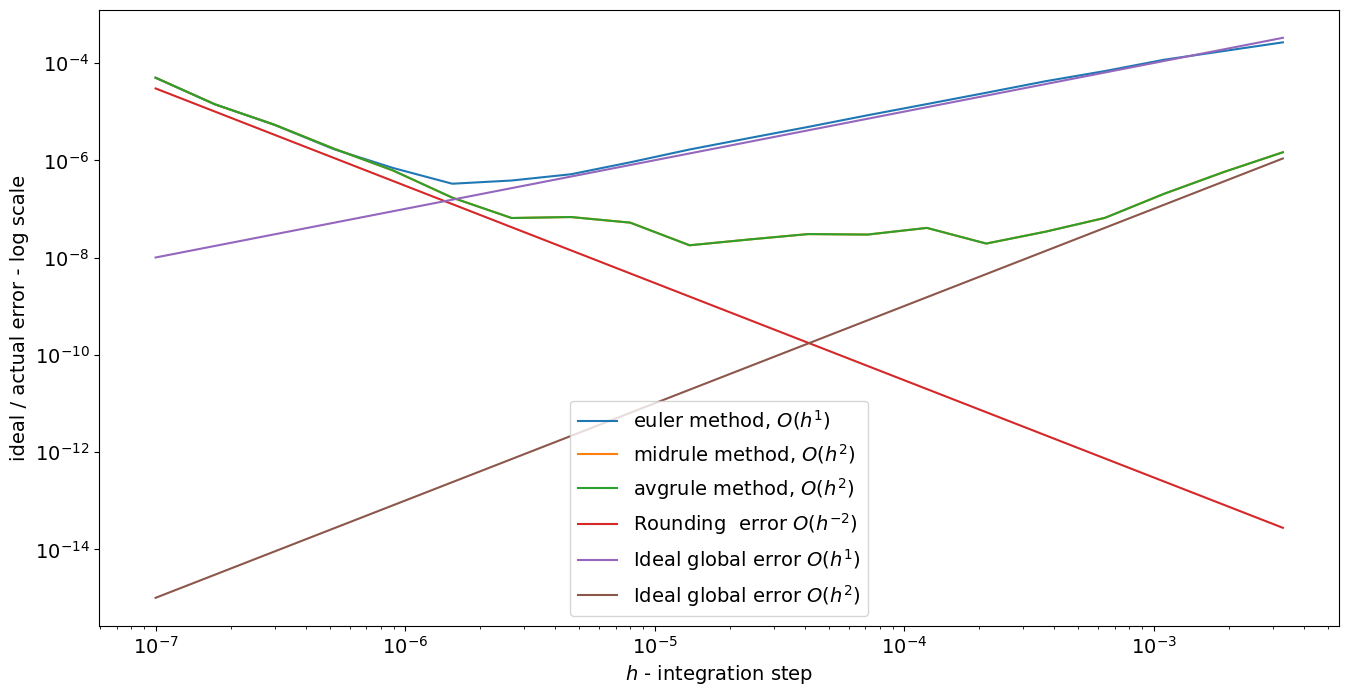

In [28]:
import matplotlib
import matplotlib.pyplot as plt

font = {'size'   : 14}

round_places = 8
rr = lambda x: np.around(x, decimals=round_places)
    
# equation coefficient
l = -5
def euler(y, h):
    yy = rr(y + rr(h * rr(l * y)))
    return yy
    
def midrule(y, h):
    y1 = rr(y + rr((0.5 *h) * rr(l*y)))
    yy = rr(y  + rr(h * rr(l * y1)))
    return yy

def avgrule(y, h):
    k1 = rr(l * y)    
    k2 = rr(l * rr(y + rr(h * k1)))
    yy = rr(y + rr((0.5 * h) * rr(k1  + k2)))
    return yy

def solve_err(h, m):
    s = solve_to_time(h, 0.01, method=m)
    return np.max(np.abs(s[4]))  # max over solved interval
    #return np.abs(s[4][-1])  # end time

matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(16,8))
methods = ((euler, 1), (midrule, 2), (avgrule, 2))
#h_steps = np.geomspace(0.000001, 0.00033, 20)
h_steps = np.geomspace(0.0000001, 0.0033, 20)
ax.set_yscale('log')    
ax.set_xscale('log')    
for m, o in methods:     
    err = [solve_err(h, m) for h in h_steps]  
        
    method_label = f"{m.__name__} method, $O(h^{o})$"    
    ax.plot(h_steps, err, label=method_label)
        
ax.plot(h_steps, 3e-19 * h_steps**(-2), label="Rounding  error $O(h^{-2})$")
ax.plot(h_steps, 1e-1 * h_steps, label="Ideal global error $O(h^1)$")
ax.plot(h_steps, 1e-1 * h_steps**2, label="Ideal global error $O(h^2)$")
ax.set_xlabel("$h$ - integration step")
ax.set_ylabel("ideal / actual error - log scale")
# for i, m in enumerate(methods):
#     method_label = f"{m.__name__} method, $O(h^{i+1})$"
#     axes[i][0].annotate(method_label, (0, 0.5), xytext=(-60, 0), ha='right', va='center',
#                 size=16, rotation=90, xycoords='axes fraction',
#                 textcoords='offset points')
#     axes[i][0].set_ylabel("$x(t)$")
#     axes[1][i].set_xlabel("t")

# ax.set_title("solution")
# axes[0][1].set_title("local error")
# axes[0][2].set_title("global error")

ax.legend()
plt.show()

There are few observation from this plot:

- There is no difference between second-order methods, although they perform a slightly different number of operations per time step.
-  The round-off error growth (red line) is not proportional to the number of performed steps $O(h^{-1})$ as expected, but rather to the square of the number of steps.
-  The order of methods (violet and brown lines) is not affected for the time step above a certain value. The actual error, blue and green, follows the optimal rate on the right side of the plot.
-  The minimal achievable error is limited from below, $10^-6$ for the first-order method and $10^-8$ for the second-order method. Also, the transition region is much more spread in the second case.